#### Estudiante: Ana María Arcila
#### c.c. 1005896770

### A)

In [1]:
import pandas as pd
import numpy as np

#importing the json file

df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')

#getting the maximum absolute value from the lists in the solution column

smax = []
for i in range(0, len(df)):
    L = []
    for n in range(0, len(list(df['solution'][i]))):
        L.append(abs(list(df['solution'][i])[n]))
    smax.append(max(L))
    
#adding smax to the dataframe

df['smax'] = smax
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [2]:
#getting a list of the sum of the numbers in the solution column

L = []
for i in range(0, len(df)):
    L.append(sum(df['solution'][i]))
df['sum_s'] = L

#getting a list of the sum of the numbers elevaed by three in the solution column

L_3 = []
for i in range(0, len(L)):
    L_3.append(L[i]**3)
df['sum_s^3'] = L_3
df

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [3]:
import random

#getting a random row number and reparating it to get the coefficients

random.seed(1005896770)

num = random.randint(1, 39007)
poly = df.loc[[num]]
coeffs = list(poly['solution'])[0]

In [4]:
#making the polynimial with the coefficients

Polinm = np.poly1d(coeffs)
print(Polinm)

   9     8     7     6     5     4     3      2
1 x - 5 x - 6 x + 7 x + 7 x - 8 x - 8 x + 13 x + 22 x - 23


In [5]:
from scipy import optimize

#getting the root of the polinomial

root = optimize.newton(Polinm, 0)
root

1.0000000000011018

In [6]:
#derivating the function

Deriv = np.polyder(Polinm)
Deriv

poly1d([  9, -40, -42,  42,  35, -32, -24,  26,  22])

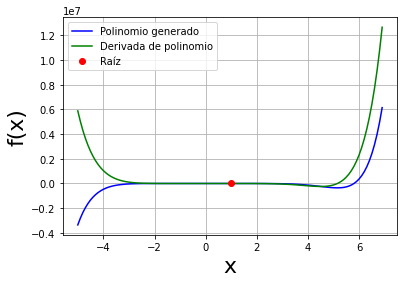

In [7]:
import matplotlib.pyplot as plt

x = np.arange(-5, 7, 0.1)

plt.figure()
plt.plot(x, Polinm(x), 'b', label = 'Polinomio generado') #plotting the function
plt.plot(x, Deriv(x), 'g', label = 'Derivada de polinomio') #plotting thr derivative
plt.plot(root, Polinm(root), 'ro', label = 'Raíz') #plotting the root
plt.legend()
plt.grid()
plt.xlabel("x", fontsize = 22)    #label of the x axis
plt.ylabel("f(x)", fontsize = 22) #label of the y axis
plt.show()

### B)

In [8]:
#selecting a random number with the seed 1005896770 to select one of the functions

random.seed(1005896770)

random.randint(1, 5)

5

In [9]:
#selectieng a random number with the seed 1005896770 for p

random.seed(1005896770)
p = random.random()
p

0.6159349634648411

In [10]:
def f(x):
    """
    
    Function for cos x + px = 0
    
    """
    return np.cos(x) + p * x

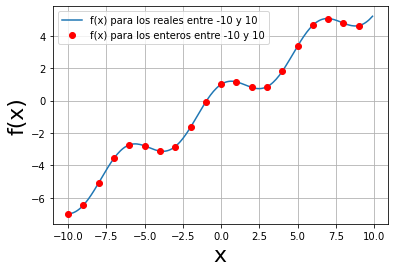

In [11]:
#lists of numbers to plot f(x)
x_1 = np.arange(-10, 10, 1) 
x_2 = np.arange(-10, 10, 0.1)

plt.figure()
plt.plot(x_2, f(x_2), label = 'f(x) para los reales entre -10 y 10') #plotting f(x) with real values
plt.plot(x_1, f(x_1), 'ro', label = 'f(x) para los enteros entre -10 y 10') #plotting f(x) with integer values
plt.legend()
plt.xlabel("x", fontsize = 22)    #name of the x axis
plt.ylabel("f(x)", fontsize = 22) #ame of the y axis
plt.grid()